## Type I NLS ##

TE Properties expressed in terms of TE integral $\mathcal{L}_{i}$

$$
    S=\frac{1}{eT} \: \frac{\mathcal{L}_{1}}{\mathcal{L}_{0}} , \tag{1}
$$

$$
    \sigma = e^{2} \mathcal{L}_{0} , \tag{2}
$$

and

$$
    \kappa_{e}=\frac{1}{T} \, \left(\mathcal{L}_{2}-\frac{\mathcal{L}_{1}^{2}}{\mathcal{L}_{0}} \right)  \tag{3}
$$

according to 

$$
    \mathcal{L}_{i} = \int \tau v^{2} \, g(E) \, \left(- \frac{\partial{f}}{\partial{E}} \right) \, (E-\mu)^{i} \quad dE \tag{4}
$$



In [63]:
import numpy as np
from scipy.integrate import quad
from numpy import zeros, linspace, exp, pi, sqrt
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
import scipy.constants as sc 

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

# Generate 2 colors from the 'Set1' colormap
colors = mpl.colormaps['tab10'](2)
infty=100
T = 300 #Temperature in K
kB = sc.physical_constants['Boltzmann constant in eV/K'][0]
kBT = kB*T
hbar = sc.physical_constants['reduced Planck constant in eV s'][0]
c_light = sc.physical_constants['speed of light in vacuum'][0]
m0 = sc.physical_constants['electron mass energy equivalent in MeV'][0]/c_light**2 #MeV/(c**2)
eff_mass1= 0.4*m0*10**(6)
e_charge = sc.physical_constants['atomic unit of charge'][0]
vF1 = 1.89e+05 #Fermi velocity
tau = 10**(-14) #relaxation time in (s)
#v = 9.95
#kB = 0.00008617 #Bolztman constant in eV/K
S_0 = kB*e_charge/e_charge

mm  = 0.145
a = 1/(2*mm)
#tau = 10**(-12) #Relaxation time

with

$k_{B} = 8.617333262 \times 10^{-5} \,\, \mathrm{eV} \cdot \mathrm{K}^{-1}$ 

$\hbar = 6.582119569 \times 10^{-16} \,\, \mathrm{eV} \cdot \mathrm{s}$

$e = 1.602176634 \times 10^{-19} \,\, \mathrm{C}$

$m_{0} = 0.51099895 \,\, \mathrm{MeV}/\mathrm{c}^{2} $

In [64]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import sys

#This function extracts the high symmetry points from the output of bandx.out
def Symmetries(fstring): 
  f = open(fstring,'r')
  x = np.zeros(0)
  for i in f:
    if "high-symmetry" in i:
      x = np.append(x,float(i.split()[-1]))
  f.close()
  return x
# This function takes in the datafile, the fermi energy, the symmetry file, a subplot, and the label
# It then extracts the band data, and plots the bands, the fermi energy in red, and the high symmetry points
def bndplot(datafile,fermi,symmetryfile,subplot,**kwargs):
  ## necessary:
  # datafile is the bands.dat.gnu file generated from band.x
  # fermi is the Fermi energy
  # symmetryfile is the standard output file of band.x (bands.pp.out)
  # subplot is the axes that you want to plot the band on

  ## optional:
  # use name_k_points=['L','G','X','U','G'] where G is Gamma point to label the high symmetry points. It must have the same length as the variable 'temp'
  # use shift_fermi=1 to shift the Fermi energy to zero
  # use color='black' to manually set the color of the band structure plot. Useful to plot two band structure together for comparison
  # use linestyle='dashed' to manually set the linestyle of the band structure plot. Useful to plot two band structure together for comparison
  # use range=[-5,5] to set the energy range for plotting the band structure
  # use legend='Si, PBE' to set the legend of the bands

  if 'shift_fermi' in kwargs:
    bool_shift_efermi = kwargs['shift_fermi']
  else:
    bool_shift_efermi = 0
  if 'color' in kwargs:
    color_bnd=kwargs['color']
  else:
    color_bnd='black'
  if 'linestyle' in kwargs:
    line_bnd=kwargs['linestyle']
  else:
    line_bnd='solid'
  
  z = np.loadtxt(datafile) #This loads the bandx.dat.gnu file
  x = np.unique(z[:,0]) #This is all the unique x-points
  bands = []
  bndl = len(z[z[:,0]==x[1]]) #This gives the number of bands in the calculation
  Fermi = float(fermi)
  if bool_shift_efermi:
    fermi_shift=Fermi
  else:
    fermi_shift=0
  axis = [min(x),max(x)]
  for i in range(0,bndl):
    bands.append(np.zeros([len(x),2])) #This is where we storre the bands
  for i in range(0,len(x)):
    sel = z[z[:,0] == x[i]]  #Here is the energies for a given x
    test = []
    for j in range(0,bndl): #This separates it out into a single band
      bands[j][i][0] = x[i]
      #bands[j][i][1] = np.multiply(sel[j][1],13.605698066)
      bands[j][i][1] = sel[j][1]
  for i in bands: #Here we plots the bands
    subplot.plot(i[:,0],i[:,1]-fermi_shift,color=color_bnd,linestyle=line_bnd)
  if 'legend' in kwargs:
    #empty plot to generate legend
    subplot.plot([None],[None],color=color_bnd,linestyle=line_bnd,label=kwargs['legend'])
  temp = Symmetries(symmetryfile)
  for j in temp: #This is the high symmetry lines
    x1 = [j,j]
    #x2 = [fermi-10,fermi+10]
    #subplot.plot(x1,x2,'--',lw=0.55,color='black',alpha=0.75)
    subplot.axvline(x=j,linestyle='solid',color='gray',alpha=0.5)
  subplot.plot([min(x),max(x)],[Fermi-fermi_shift,Fermi-fermi_shift],color='red',linestyle='dotted')
  subplot.set_xticks(temp)
  subplot.set_xticklabels([])
  if 'name_k_points' in kwargs:
    if len(kwargs['name_k_points'])==len(temp):
      subplot.set_xticklabels(kwargs['name_k_points'])
  if 'range' in kwargs:
    range_plot=kwargs['range']
    subplot.set_ylim([range_plot[0],range_plot[1]])
  subplot.set_xlim([axis[0],axis[1]])
  subplot.set_xlabel('k')
  subplot.set_ylabel('energy (eV)')
  if 'legend' in kwargs:
    subplot.legend()
  return bands

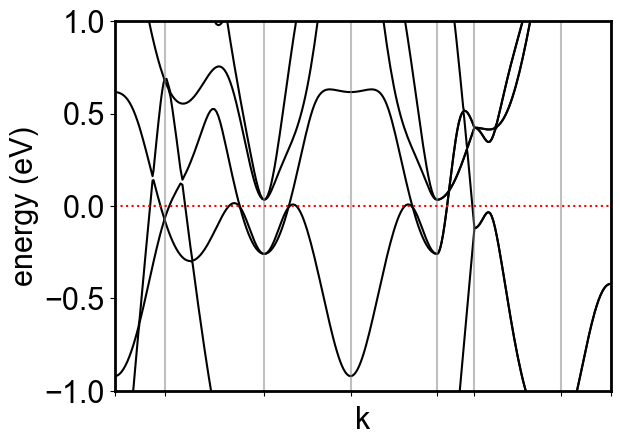

In [65]:
datafile='Bands\TiS.bands.gnu' 
fermi = 13.15
#fermi = 7.5
symmetryfile='Bands\TiS.bands.out'
bool_shift_efermi= True
fig, ax = plt.subplots()

#bndplot(datafile,fermi,symmetryfile,ax)
band = bndplot(datafile,fermi,symmetryfile,ax,shift_fermi=bool_shift_efermi,color='black',linestyle='solid',range=[-1,1])

kc = band[19][:,0]
Ekc = band[19][:,1]
kv = band[18][:,0]
Ekv = band[18][:,1]

kvv = np.append(kv[100:150]-1.574,kv[0:50])
Ekvv = np.append(Ekv[100:150],Ekv[0:50])
kcc = np.append(kc[100:150]-1.574,kc[0:50])
Ekcc = np.append(Ekc[100:150],Ekc[0:50])


\begin{equation}
 \sigma_{0,c} = \frac{\tau e^{2}(k_{B}T)^{2}}{3 \pi^{2} \hbar^{3} v_{F}} \,, \tag{5}
\end{equation}

\begin{equation}
    \sigma_{0,v} = \frac{2 \tau e^{2}(k_{B}T)}{3 \pi^{2} \hbar^{2}} \, \sqrt{\frac{2 m k_{B}T}{\hbar^{2}}} \,, \tag{6}
\end{equation}

\begin{equation}
    \kappa_{0,c} = \frac{\tau k_{B}^{4} T^{3}}{3 \pi^{2} \hbar^{3} v_{F}} \,, \tag{7}
\end{equation}

\begin{equation}
    \kappa_{0,v} = \frac{2 \tau k_{B}^{3}T^{2}}{3 \pi^{2} \hbar^{2}} \, \sqrt{\frac{2m k_{B}T}{\hbar^{2}}} \, . \tag{8}
\end{equation}

Sigma0c = 670.9939043693811
Sigma0v = 3364.3223235236924
Kappa0c = 0.0014948086676394648
Kappa0v = 0.0074948790699709425


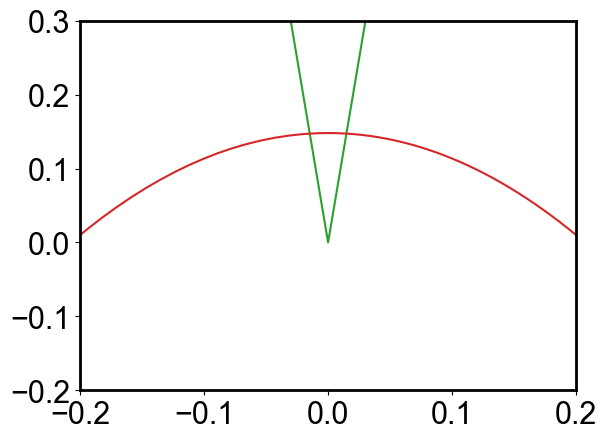

In [66]:
plt.plot(kcc,Ekcc-13.14)
plt.plot(kvv,Ekvv-13.14)
plt.xlim([-0.2,0.2])
plt.ylim([-0.2,0.3])
#plt.axvline(x=0)

v  = 9.95
v1 = 8.00
v2 = 11.90
v3 = 13.85
fc = v*np.abs(kcc)
fc1 = v1*np.abs(kcc)
fc2 = v2*np.abs(kcc)
fc3 = v3*np.abs(kcc)
plt.plot(kcc,fc)

a = 5.5
b = 490
#a = 17
#b = 5000

mm  = 0.145
a = 1/(2*mm)
ee1 = 0.61*kBT
#fv = -(kcc**2/(4*mm)-ee1)**2/ee1
fv = -(kcc**2/(2*mm) )
#fv = a*kcc**2 - b*kcc**4
plt.plot(kcc,fv+0.148)
#plt.plot(kcc,fv+0.135)
#plt.figure()
#plt.plot(kcc,Ekcc-fc-7.4)
#plt.ylim([-0.2,0.2])
#plt.xlim([-0.3,0.3])

npoint = 301
eta = linspace(-25, 25, npoint)  

kT = 0.026
#alpha = v**2/(4*a)/(kBT)
#e1 = a**2/(4*b)/(kBT)
#e1 = -(min(Ekcc) - max(Ekvv))/(kBT)
#e1 = ee1/kBT
#e1 = 0.61
mm = 0.145
a = 1/(2*mm)
e0 = 0.135/kBT
#eshift = -4
m = 1/(6*a)

mm1=0.070
a1=1/(2*mm1)
m1=1/(6*a1)

mm2=0.295
a2=1/(2*mm2)
m2=1/(6*a2)

#Reference Parameters Calculation

#Sigma0c
def Sigma0c(vF):
    frac1c= tau*e_charge**2*kBT**2
    return frac1c/(3*pi**2*hbar**3*vF*e_charge)
print('Sigma0c =',Sigma0c(vF1))

#Sigma0v
def Sigma0v(eff_mass):
    frac1v = 2*tau*e_charge**2*kBT/(3*pi**2*hbar**2)
    frac2v = 2*eff_mass*kBT/(hbar**2)
    rootv  = np.sqrt(frac2v)
    return frac1v*rootv/e_charge
print('Sigma0v =',Sigma0v(eff_mass1))

#Sigma for parameter
sigma0= Sigma0v(eff_mass1)

#Kappa
#kappa0c = tau*kB**4*T**3/(3*pi**2*hbar**3*vF1)*e_charge
def Kappa0c(vF):
    return  tau*kB**4*T**3/(3*pi**2*hbar**3*vF)*e_charge
print('Kappa0c =',Kappa0c(vF1))

#kappa0v = 2*tau*kB**3*T**2/(3*pi**2*hbar**2)*rootv*e_charge
def Kappa0v(eff_mass):
    fracv = 2*eff_mass*kBT/(hbar**2)
    rootv  = np.sqrt(fracv)
    return  2*tau*kB**3*T**2/(3*pi**2*hbar**2)*rootv*e_charge
print('Kappa0v =',Kappa0v(eff_mass1))
kappa0=Kappa0v(eff_mass1)

## Two-Band Model ##

Conduction band contribution:
$$
    \mathcal{L}_{c,i} = \frac{(k_{B}T)^{i+2}}{3\pi^{2}\hbar^{3}v_{F}} \int_{0}^{\infty} \tau (x+\eta)^{2} \: x^{i} \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{5}
$$

Valence band contribution:
$$
    \mathcal{L}_{v,i} = \frac{2(k_{B}T)^{i+3/2}\sqrt{2m}}{3 \pi^{2} \hbar^{3}} \, \int_{-\infty}^{\varepsilon_{0}} \, \tau (-x-\eta+\varepsilon_{0})^{3/2} \: x^{i} \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{6}
$$

**TE integral vonduction band contribution:**

$$
    \mathcal{L}_{c,0} = \frac{(k_{B}T)^{2}}{3\pi^{2}\hbar^{3}v_{F}} \int_{-\eta}^{\infty} \tau (x+\eta)^{2} \:  \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{7}
$$

$$
    \mathcal{L}_{c,1} = \frac{(k_{B}T)^{3}}{3\pi^{2}\hbar^{3}v_{F}} \int_{-\eta}^{\infty} \tau (x+\eta)^{2} \: x \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{8}
$$

$$
    \mathcal{L}_{c,2} = \frac{(k_{B}T)^{4}}{3\pi^{2}\hbar^{3}v_{F}} \int_{-\eta}^{\infty} \tau (x+\eta)^{2} \: x^{2} \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{9}
$$

**TE integral valence band contribution:**

$$
    \mathcal{L}_{v,0} = \frac{2(k_{B}T)^{3/2}\sqrt{2m}}{3 \pi^{2} \hbar^{3}} \, \int_{-\infty}^{\varepsilon_{0}-\eta} \, \tau (-x-\eta+\varepsilon_{0})^{3/2} \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{10}
$$

$$
    \mathcal{L}_{v,1} = \frac{2(k_{B}T)^{5/2}\sqrt{2m}}{3 \pi^{2} \hbar^{3}} \, \int_{-\infty}^{\varepsilon_{0}-\eta} \, \tau (-x-\eta+\varepsilon_{0})^{3/2} \: x \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{11}
$$

$$
    \mathcal{L}_{v,2} = \frac{2(k_{B}T)^{7/2}\sqrt{2m}}{3 \pi^{2} \hbar^{3}} \, \int_{-\infty}^{\varepsilon_{0}-\eta} \, \tau (-x-\eta+\varepsilon_{0})^{3/2} \: x^{2} \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{12}
$$

**By applying two-band model we obtain**

$$
    S = \frac{S_{c} \sigma_{c}+S_{v} \sigma_{v}}{\sigma_{c}+{\sigma_{v}}} \tag{13}
$$

$$
    \sigma = \sigma_{c} + \sigma_{v} \tag{14}
$$


$$
   \kappa = \kappa_{e,c}+\kappa_{e,v}+\frac{\sigma_{c} \sigma_{v}}{\sigma_{c}+\sigma{v}}(S_{c}-S_{v})^{2} \tag{15}
$$

In [67]:

def L0c(xx,E0):
    def integrand1(x, xx):
        return (x+xx)**2*(exp(x)/ (exp(x)+1)**2)
    I1, error = quad(integrand1, -xx, infty, args=(xx))
    return I1

def L1c(xx,E0):
    def integrand1(x,xx):
        return (x+xx)**2*x*(exp(x)/(exp(x)+1)**2)
    I1, error=quad(integrand1, -xx, infty, args=(xx))
    return I1

def L2c(xx,E0):
    def integrand1(x,xx):
        return (x+xx)**2*x**2*(exp(x)/(exp(x)+1)**2)
    I1, error=quad(integrand1, -xx, infty, args=(xx))
    return I1

def L0v(xx, E0):
    def integrand1(x,xx):
        return (-x-xx+E0)**(3/2)*exp(x)/((exp(x)+1)**2)
    I1, error = quad(integrand1, -infty, E0-xx, args=(xx))
    return I1

def L1v(xx, E0):
    def integrand1(x,xx):
        return (-x-xx+E0)**(3/2)*x*exp(x)/ ((exp(x)+1)**2)
    I1, error = quad(integrand1, -infty, E0-xx, args=(xx))
    return I1

def L2v(xx, E0):
    def integrand1(x,xx):
        return (-x-xx+E0)**(3/2)*x**2*exp(x)/ ((exp(x)+1)**2)
    I1, error = quad(integrand1, -infty, E0-xx, args=(xx))
    return I1

def sigma_c(x, W,vF):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0c(x[i], W)
    return sgm*Sigma0c(vF)

def S_c(x, W):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = L1c(x[i], W)/L0c(x[i],W)  
    return sc*S_0

def kappa_c(x,W,vF):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2c(x[i],W)-(L1c(x[i],W)**2/L0c(x[i],W)))
    return kpp*Kappa0c(vF)

def sigma_v(x,W,eff_mass):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i]= L0v(x[i], W)
    return sgm*Sigma0v(eff_mass)

def S_v(x,W):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i]= L1v(x[i], W)/L0v(x[i], W)
    return sc*S_0

def kappa_v(x,W,eff_mass):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2v(x[i],W)-(L1v(x[i],W)**2/L0v(x[i],W)))
    return kpp*Kappa0v(eff_mass)

def sigma(x,W,vF,eff_mass):
    return (sigma_c(x,W,vF)+sigma_v(x,W,eff_mass))

def S(x,W,vF,eff_mass):
    return (sigma_c(x,W,vF)*S_c(x,W)+sigma_v(x,W,eff_mass)*S_v(x,W))/sigma(x,W,vF,eff_mass)

def kappa(x,W,vF,eff_mass):
    return kappa_c(x,W,vF)+kappa_v(x,W,eff_mass)+(sigma_c(x,W,vF)*sigma_v(x,W,eff_mass)*(S_c(x,W)-S_v(x,W))**2)/sigma(x,W,vF,eff_mass)*T

def PF(x,W,vF,eff_mass):
    return S(x,W,vF,eff_mass)**2*sigma(x,W,vF,eff_mass)

def ZT(x,W,vF,eff_mass):
    return PF(x,W,vF,eff_mass)/(kappa(x,W,vF,eff_mass))


# Results Plot

## Dispersion Relation


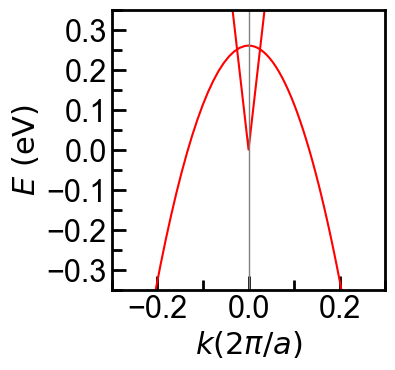

In [68]:
plt.figure(figsize=(12,8))

npoint= 301
eta = linspace(-15, 15, npoint)
eshift1 = 6.5
eshift2=9
eshift3=4.5
e0 = 0.26/kBT # Find E0 from the first-principles result
aa = 5.17197703e-23
vF2 = 5.17e+05
vF3 = 1.03e+05

#(a) Dispersion relation
ax = plt.subplot(2,3,1)
ax.plot(kcc,fc, linestyle='solid', color='red', label=r'$D_{1}$')
#ax.plot(kcc,fc1,linestyle='--', color='blue', label=r'$D_{2}$')
#ax.plot(kcc,fc2,linestyle='--', color='blue', label=r'$D_{3}$')
ax.plot(kcc,-kcc**2/(2*0.034)+0.26,linestyle='-', color='red', label=r'$P_{2}$')
#ax.plot(kcc,-kcc**2/(2*0.068)+0.26,linestyle='-', color='green', label=r'$P_{1}$')
#ax.plot(kcc,-kcc**2/(2*0.102)+0.26,linestyle='-', color='blue', label=r'$P_{3}$')
ax.axis([-0.3,0.3,-0.35,0.35])
ax.set_xlabel('$k (2\pi/a)$')
ax.set_ylabel('$E~(\mathrm{eV})$')
ax.axvline(0, color='grey', linestyle='-', linewidth=1)
#plt.legend(loc='center',  bbox_to_anchor=(0.2, 0.3, 0.2, 0.2))

ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

## Varying Fermi velocity $v_{F}$

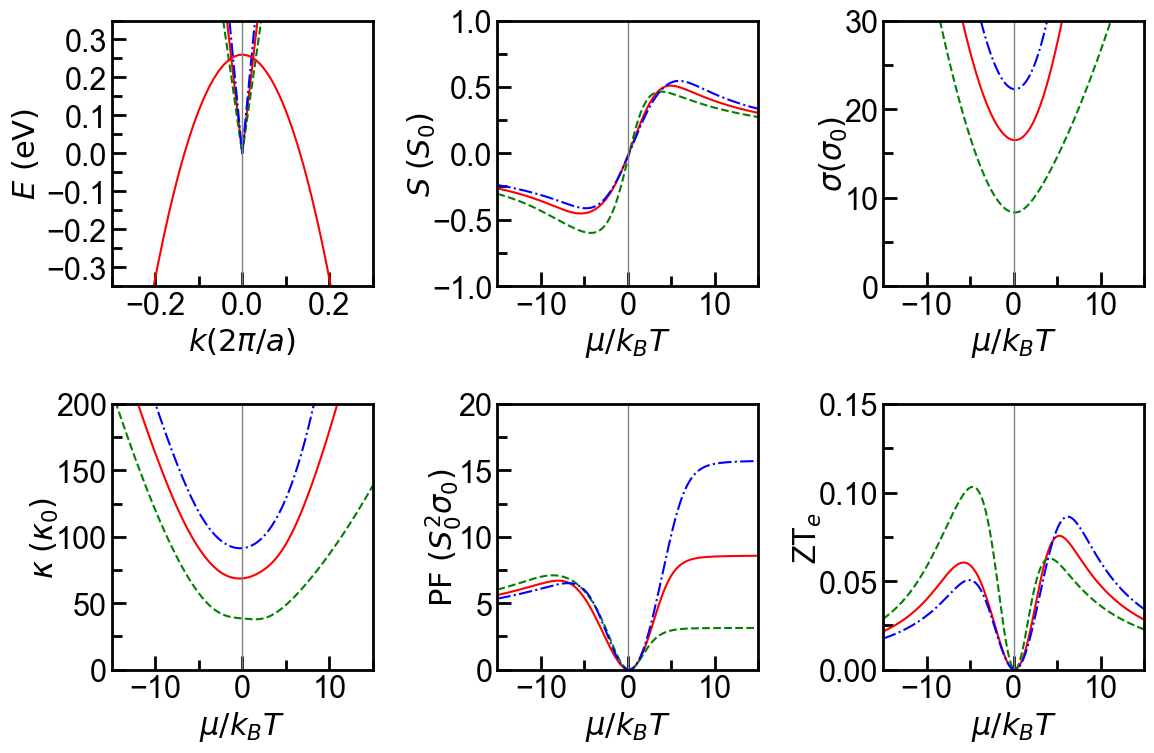

In [69]:
plt.figure(figsize=(12,8))

npoint= 301
eta = linspace(-15, 15, npoint)
eshift1 = 6.5
eshift2=9
eshift3=4.5
e0 = 0.26/kBT # Find E0 from the first-principles result
aa = 5.17197703e-23
vF2 = 5.17e+05
vF3 = 1.03e+05

#(a) Dispersion relation
ax1 = plt.subplot(2,3,1)
ax1.plot(kcc,fc, linestyle='solid', color='red', label=r'$D_{1}$')
ax1.plot(kcc,fc1,linestyle='dashed', color='green', label=r'$D_{2}$')
ax1.plot(kcc,fc2,linestyle='dashdot', color='blue', label=r'$D_{3}$')
ax1.plot(kcc,-kcc**2/(2*0.034)+0.26,linestyle='-', color='red', label=r'$P_{2}$')
ax1.axis([-0.3,0.3,-0.35,0.35])
ax1.set_xlabel('$k (2\pi/a)$')
ax1.set_ylabel('$E~(\mathrm{eV})$')
ax1.axvline(0, color='grey', linestyle='-', linewidth=1)
#ax1.legend()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(b) Seebeck coefficient
ax2=plt.subplot(2,3,2)
#ax2.plot(eta, S_c(eta+eshift,e0)/S_0, 'r--')
#ax2.plot(eta, S_v(eta+eshift,e0)/S_0, 'g:')
ax2.plot(eta, S(eta+eshift1,e0,vF1,eff_mass1)/S_0, color='red',linestyle='solid') 
ax2.plot(eta, S(eta+eshift2,e0,vF2,eff_mass1)/S_0, color='green',linestyle='dashed')
ax2.plot(eta, S(eta+eshift3,e0,vF3,eff_mass1)/S_0, color='blue',linestyle='dashdot')
ax2.axis([-15,15,-1,1])
ax2.axvline(0, color='grey', linestyle='-', linewidth=1)
ax2.set_xlabel('$\mu/k_BT$')
ax2.set_ylabel('$S$ $(S_0)$')
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.labelpad = -4
#ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
#ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(c) Electrical conductivity
ax3=plt.subplot(2,3,3)
#ax3.plot(eta, sigma_c(eta+eshift,e0,vF1)/sigma0, 'r--')
#ax3.plot(eta, sigma_v(eta+eshift,e0,eff_mass1)/sigma0, 'g:')
ax3.plot(eta, sigma(eta+eshift1,e0,vF1,eff_mass1)/sigma0,color='red',linestyle='solid')
ax3.plot(eta, sigma(eta+eshift2,e0,vF2,eff_mass1)/sigma0,color='green',linestyle='dashed')
ax3.plot(eta, sigma(eta+eshift3,e0,vF3,eff_mass1)/sigma0,color='blue',linestyle='dashdot')
ax3.axis([-15,15,0, 30])
ax3.axvline(0, color='grey', linestyle='-', linewidth=1)
ax3.set_xlabel('$\mu/k_BT$')
ax3.set_ylabel('$\sigma (\sigma_0)$')
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.labelpad = -4
ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax3.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax3.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(d) Thermal conductivity
ax4 = plt.subplot(2,3,4)
#ax4.plot(eta, kappa_c(eta+eshift,e0,vF1)/kappa0, 'r--')
#ax4.plot(eta, kappa_v(eta+eshift,e0,eff_mass1)/kappa0, 'g:')
ax4.plot(eta, kappa(eta+eshift1,e0,vF1,eff_mass1)/kappa0,color='red',linestyle='solid')
ax4.plot(eta, kappa(eta+eshift2,e0,vF2,eff_mass1)/kappa0,color='green',linestyle='dashed')
ax4.plot(eta, kappa(eta+eshift3,e0,vF3,eff_mass1)/kappa0,color='blue',linestyle='dashdot')
ax4.axis([-15,15,0,200]) # the format is [xmin,xmax,ymin,ymax]
ax4.axvline(0, color='grey', linestyle='-', linewidth=1)
ax4.xaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.labelpad = -4
ax4.set_xlabel('$\mu/k_BT$')
ax4.set_ylabel('$\kappa$ $(\kappa_0)$')
#ax4.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
#ax4.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax4.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax4.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax4.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(e) Power Factor
ax5 = plt.subplot(2,3,5)
#ax5.plot(eta, PF(eta+eshift,e0)/sigma0, linestyle='solid', color ='magenta')
ax5.plot(eta, PF(eta+eshift1,e0,vF1,eff_mass1)/(S_0**2*sigma0), linestyle='solid', color ='red')
ax5.plot(eta, PF(eta+eshift2,e0,vF2,eff_mass1)/(S_0**2*sigma0), linestyle='dashed', color ='green')
ax5.plot(eta, PF(eta+eshift3,e0,vF3,eff_mass1)/(S_0**2*sigma0), linestyle='dashdot', color ='blue')
ax5.axis([-15,15,0,20]) # the format is [xmin,xmax,ymin,ymax]
ax5.axvline(0, color='grey', linestyle='-', linewidth=1)
ax5.xaxis.set_minor_locator(AutoMinorLocator(2))
ax5.yaxis.set_minor_locator(AutoMinorLocator(2))
ax5.yaxis.labelpad = -4
ax5.set_xlabel('$\mu/k_BT$')
ax5.set_ylabel('$\mathrm{PF}~(S_0^2 \sigma_0)$')
#ax5.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1*1e-5))
#ax5.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax5.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax5.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax5.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax5.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(e) ZT
ax6 = plt.subplot(2,3,6)
ax6.plot(eta, ZT(eta+eshift1,e0,vF1,eff_mass1)*T,color='red',linestyle='solid')
ax6.plot(eta, ZT(eta+eshift2,e0,vF2,eff_mass1)*T,color='green',linestyle='dashed')
ax6.plot(eta, ZT(eta+eshift3,e0,vF3,eff_mass1)*T,color='blue',linestyle='dashdot')
ax6.axis([-15,15,0,0.15]) # the format is [xmin,xmax,ymin,ymax]
ax6.axvline(0, color='grey', linestyle='-', linewidth=1)
ax6.xaxis.set_minor_locator(AutoMinorLocator(2))
ax6.yaxis.set_minor_locator(AutoMinorLocator(2))
ax6.yaxis.labelpad = -4
ax6.set_xlabel('$\mu/k_BT$')
ax6.set_ylabel('ZT$_{e}$')
#ax6.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.010))
#ax6.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax6.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax6.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax6.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax6.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

plt.tight_layout()
#plt.savefig('2BM_typeI(velocity).pdf')


$S_{0} = 86.17 \,\, \mathrm{\mu}\mathrm{V}/\mathrm{K}$

$\sigma_{0} = 3.364 \times 10^{3} \,\, \mathrm{S}/ \mathrm{m}$

$\kappa_{0} = 0.0074948790699709425 \,\, \mathrm{W}/\mathrm{m} \cdot \mathrm{K}$

## Varying Effective Mass $m$

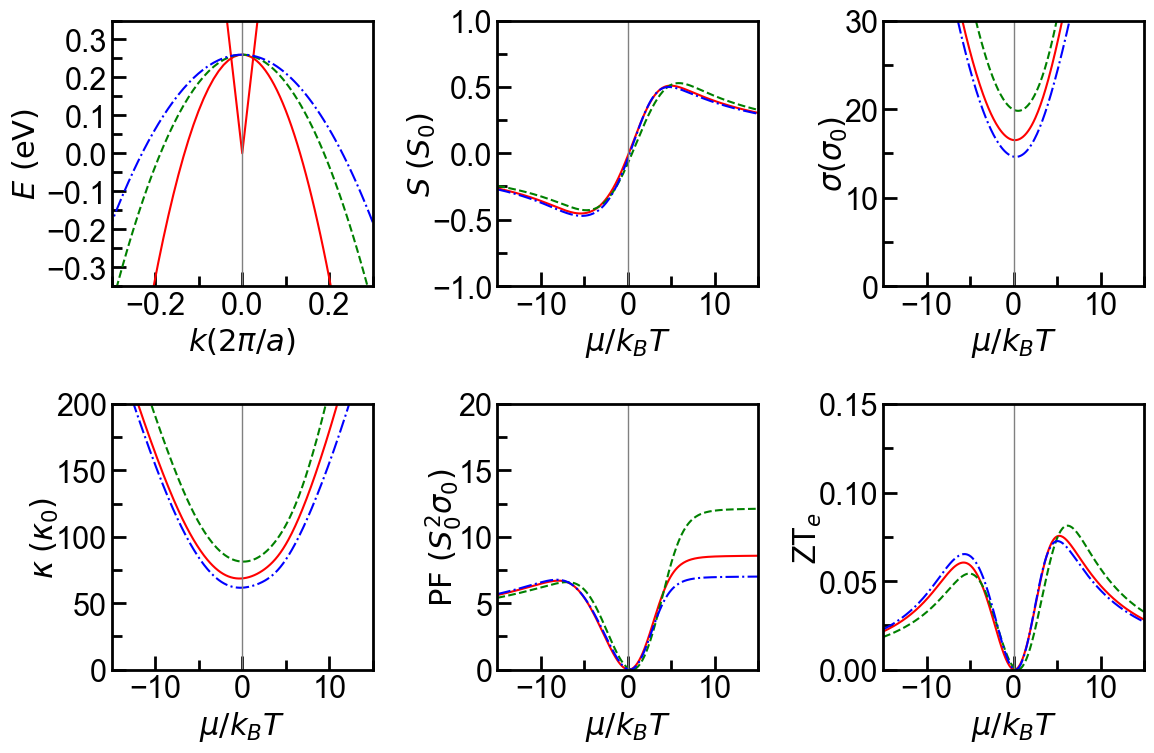

In [70]:
plt.figure(figsize=(12,8))

eff_mass2= 0.2*m0*10**(6)
eff_mass3= 0.6*m0*10**(6)
eshiftm1=eshift1
eshiftm2=5
eshiftm3=7


#(a) Dispersion relation
ax1 = plt.subplot(2,3,1)
ax1.plot(kcc,fc, linestyle='solid', color='red', label=r'$D_{1}$')
ax1.plot(kcc,-kcc**2/(2*0.034)+0.26,linestyle='solid', color='red', label=r'$P_{2}$')
ax1.plot(kcc,-kcc**2/(2*0.068)+0.26,linestyle='dashed', color='green', label=r'$P_{1}$')
ax1.plot(kcc,-kcc**2/(2*0.102)+0.26,linestyle='dashdot', color='blue', label=r'$P_{3}$')
ax1.axis([-0.3,0.3,-0.35,0.35])
ax1.axvline(0, color='grey', linestyle='-', linewidth=1)
ax1.set_xlabel('$k (2\pi/a)$')
ax1.set_ylabel('$E~(\mathrm{eV})$')
#ax1.legend()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(b) Seebeck coefficient
ax2 = plt.subplot(2,3,2)
ax2.plot(eta, S(eta+eshiftm1,e0,vF1,eff_mass1)/S_0,color='red',linestyle='solid')
ax2.plot(eta, S(eta+eshiftm2,e0,vF1,eff_mass2)/S_0,color='green',linestyle='dashed')
ax2.plot(eta, S(eta+eshiftm3,e0,vF1,eff_mass3)/S_0,color='blue',linestyle='dashdot')
ax2.axis([-15,15,-1,1])
ax2.axvline(0, color='grey', linestyle='-', linewidth=1)
ax2.set_xlabel('$\mu/k_BT$')
ax2.set_ylabel('$S$ $(S_0)$')
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.labelpad = -4
#ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
#ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(c) Electrical conductivity
ax3=plt.subplot(2,3,3)
ax3.plot(eta, sigma(eta+eshiftm1,e0,vF1,eff_mass1)/sigma0,color='red',linestyle='solid')
ax3.plot(eta, sigma(eta+eshiftm2,e0,vF1,eff_mass2)/Sigma0v(eff_mass2), color='green',linestyle='dashed')
ax3.plot(eta, sigma(eta+eshiftm3,e0,vF1,eff_mass3)/Sigma0v(eff_mass3), color='blue',linestyle='dashdot')
ax3.axis([-15,15,0, 30])
ax3.axvline(0, color='grey', linestyle='-', linewidth=1)
ax3.set_xlabel('$\mu/k_BT$')
ax3.set_ylabel('$\sigma (\sigma_0)$')
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.labelpad = -4
ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax3.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax3.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(d) Thermal conductivity
ax4 = plt.subplot(2,3,4)
ax4.plot(eta, kappa(eta+eshiftm1,e0,vF1,eff_mass1)/kappa0,color='red',linestyle='solid')
ax4.plot(eta, kappa(eta+eshiftm2,e0,vF1,eff_mass2)/Kappa0v(eff_mass2), color='green',linestyle='dashed')
ax4.plot(eta, kappa(eta+eshiftm3,e0,vF1,eff_mass3)/Kappa0v(eff_mass3), color='blue',linestyle='dashdot')
ax4.axis([-15,15,0,200]) # the format is [xmin,xmax,ymin,ymax]
ax4.axvline(0, color='grey', linestyle='-', linewidth=1)
ax4.xaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.labelpad = -4
ax4.set_xlabel('$\mu/k_BT$')
ax4.set_ylabel('$\kappa$ $(\kappa_0)$')
#ax4.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
#ax4.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax4.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax4.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax4.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(e) Power Factor
ax5 = plt.subplot(2,3,5)
#ax5.plot(eta, PF(eta+eshift,e0)/sigma0, linestyle='solid', color ='magenta')
ax5.plot(eta, PF(eta+eshiftm1,e0,vF1,eff_mass1)/(S_0**2*sigma0),linestyle='solid',color ='red')
ax5.plot(eta, PF(eta+eshiftm2,e0,vF1,eff_mass2)/(S_0**2*Sigma0v(eff_mass2)),linestyle='dashed',color ='green')
ax5.plot(eta, PF(eta+eshiftm3,e0,vF1,eff_mass3)/(S_0**2*Sigma0v(eff_mass3)),linestyle='dashdot',color ='blue')
ax5.axis([-15,15,0,20]) # the format is [xmin,xmax,ymin,ymax]
ax5.axvline(0, color='grey', linestyle='-', linewidth=1)
ax5.xaxis.set_minor_locator(AutoMinorLocator(2))
ax5.yaxis.set_minor_locator(AutoMinorLocator(2))
ax5.yaxis.labelpad = -4
ax5.set_xlabel('$\mu/k_BT$')
ax5.set_ylabel('$\mathrm{PF}~(S_0^2 \sigma_0)$')
#ax5.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1*1e-5))
#ax5.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax5.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax5.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax5.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax5.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(f) ZT
ax6 = plt.subplot(2,3,6)
ax6.plot(eta, ZT(eta+eshiftm1,e0,vF1,eff_mass1)*T,color='red',linestyle='solid')
ax6.plot(eta, ZT(eta+eshiftm2,e0,vF1,eff_mass2)*T,color='green',linestyle='dashed')
ax6.plot(eta, ZT(eta+eshiftm3,e0,vF1,eff_mass3)*T,color='blue',linestyle='dashdot')
ax6.axis([-15,15,0,0.15]) # the format is [xmin,xmax,ymin,ymax]
ax6.axvline(0, color='grey', linestyle='-', linewidth=1)
ax6.xaxis.set_minor_locator(AutoMinorLocator(2))
ax6.yaxis.set_minor_locator(AutoMinorLocator(2))
ax6.yaxis.labelpad = -4
ax6.set_xlabel('$\mu/k_BT$')
ax6.set_ylabel('ZT$_{e}$')
#ax6.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.010))
#ax6.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax6.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax6.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax6.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax6.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')


plt.tight_layout()
#plt.savefig('2BM_typeI(mass).pdf')
